In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# import necessary library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/Churn_Modelling.csv')

# **Representing The Data **

In [ ]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Wrangling[check NULL,Dublicated,Outlier and neglect unnecessary columns]

In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
data.duplicated().sum()
print(data.columns)

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
data = data.drop(['Surname'],axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


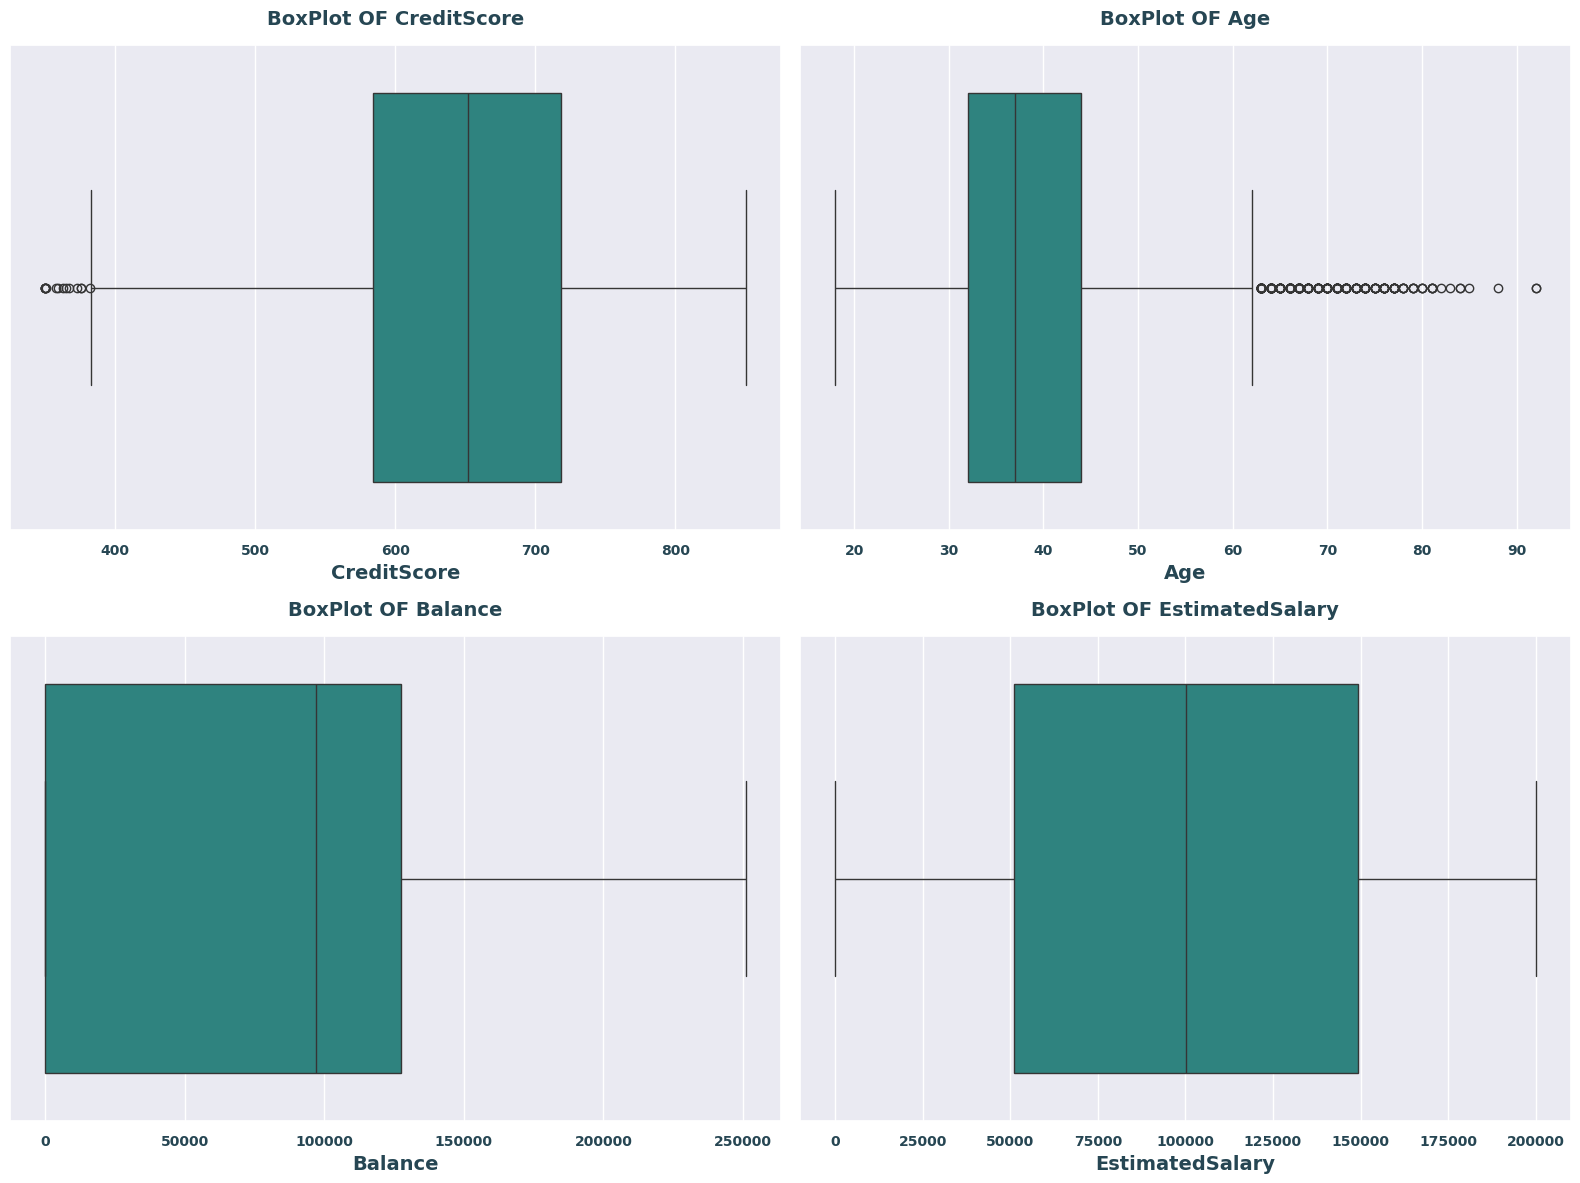

In [ ]:
plt.rcParams['figure.figsize'] = (16,12)
sns.set_theme(style='darkgrid')

#select numeric feature to check the outlier
Features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

#using boxblot to show the outlier
for i in range(len(Features)):
    plt.subplot(2,2,i+1)
    plt.title(f"BoxPlot OF {Features[i]}", fontsize=14, fontweight='bold', color='#264653', pad=15)
    sns.boxplot(x=Features[i],data = data,palette='viridis')
    plt.xlabel(Features[i],fontsize = 14,fontweight = 'bold',color = '#264653')
    plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.tight_layout()
plt.show()

# **starting analysis**

# **Univariate Analysis**

**CreditScore Column**

In [ ]:
data.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data[['CreditScore']].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0


In [ ]:
poor_CreditScore = data['CreditScore'][(data.CreditScore >= 300) & (data.CreditScore < 500)]
len(poor_CreditScore)

632

In [ ]:
good_CreditScore = data['CreditScore'][(data.CreditScore >= 500) & (data.CreditScore < 650)]
len(good_CreditScore)

4268

In [ ]:
Very_good_CreditScore = data['CreditScore'][(data.CreditScore >= 650) & (data.CreditScore < 800)]
len(Very_good_CreditScore)

4445

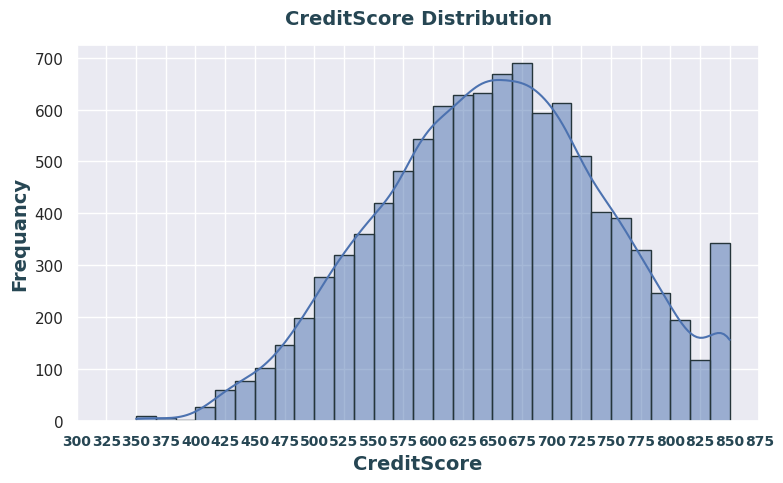

In [ ]:
#showing the CreditStore distribution using histogram
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (8,5)

sns.histplot(x='CreditScore',data = data,palette='viridis',bins=30,kde=True,edgecolor = '#25353B')
plt.xlabel('CreditScore',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.ylabel('Frequancy',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xticks(np.arange(300,900,25),fontsize = 10,fontweight = 'bold',color = '#264653')
plt.title("CreditScore Distribution", fontsize=14, fontweight='bold', color='#264653', pad=15)

plt.tight_layout()
plt.show()

**69% from the customers have cridit score between 555 and 750**

**95% from the customers have cridit score between 455 and 845**

**99% from the customers have cridit score between 360 and 850**

**The distribution of credit scores is slightly skewed to the Left, meaning some customers have lower credit scores (closer to 350).**

****************************************************************************************************
****************************************************************************************************

**Geography Column**

In [ ]:
data[['Geography']].value_counts()

Geography
France       5014
Germany      2509
Spain        2477
Name: count, dtype: int64

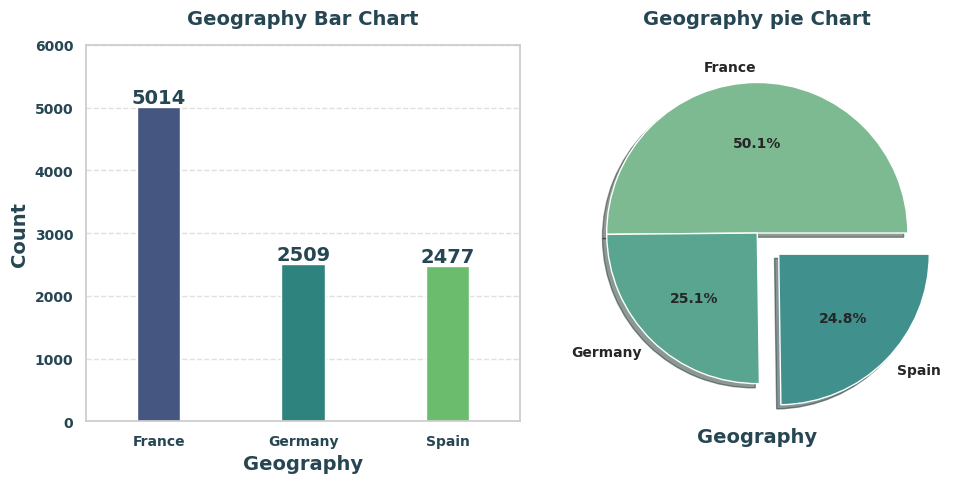

In [ ]:
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

country = data['Geography'].value_counts().index
val = data['Geography'].value_counts().values

plt.subplot(1,2,1)

#BAR CHART
plt.grid(axis='y',linestyle = '--',alpha = 0.7,color='#d3d3d3')
ax = sns.countplot(x = 'Geography',data = data,palette = 'viridis',width=0.3,order=country)
for container in ax.containers:
    ax.bar_label(container,fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xlabel('Geography',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.ylabel('Count',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(np.arange(0,6001,1000),fontsize = 10,fontweight = 'bold',color = '#264653')
plt.title("Geography Bar Chart", fontsize=14, fontweight='bold', color='#264653', pad=15)

plt.subplot(1,2,2)

#pie Chart
plt.pie(val,labels=country,radius=1,explode = [0,0,0.2],autopct='%0.1f%%',shadow=True,colors = sns.color_palette("crest"),textprops={'fontsize':10,'fontweight':'bold'})
plt.title("Geography pie Chart", fontsize=14, fontweight='bold', color='#264653', pad=15)
plt.xlabel('Geography',fontsize = 14,fontweight = 'bold',color = '#264653')

plt.tight_layout()
plt.show()

**Gender Column**

In [ ]:
data.Gender.value_counts(normalize=True) * 100

Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64

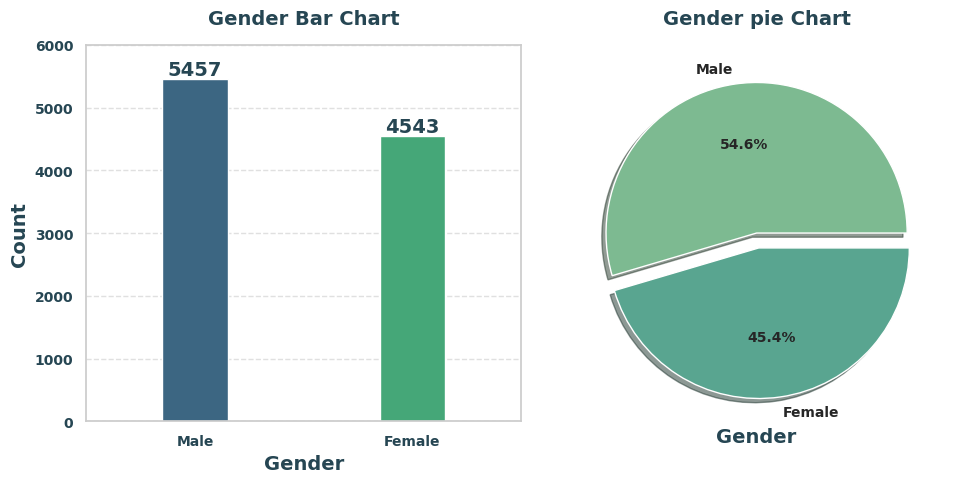

In [ ]:
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

gender = data['Gender'].value_counts().index
gender_val = data['Gender'].value_counts().values

plt.subplot(1,2,1)

#BAR CHART
plt.grid(axis='y',linestyle = '--',alpha = 0.7,color='#d3d3d3')
ax = sns.countplot(x = 'Gender',data = data,palette = 'viridis',width=0.3,order=gender)
for container in ax.containers:
    ax.bar_label(container,fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xlabel('Gender',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.ylabel('Count',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(np.arange(0,6001,1000),fontsize = 10,fontweight = 'bold',color = '#264653')
plt.title("Gender Bar Chart", fontsize=14, fontweight='bold', color='#264653', pad=15)

plt.subplot(1,2,2)

#pie Chart
plt.pie(gender_val,labels=gender,radius=1,explode = [0,0.1],autopct='%0.1f%%',shadow=True,colors = sns.color_palette("crest"),textprops={'fontsize':10,'fontweight':'bold'})
plt.title("Gender pie Chart", fontsize=14, fontweight='bold', color='#264653', pad=15)
plt.xlabel('Gender',fontsize = 14,fontweight = 'bold',color = '#264653')

plt.tight_layout()
plt.show()

**Age Column**

In [ ]:
data[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0


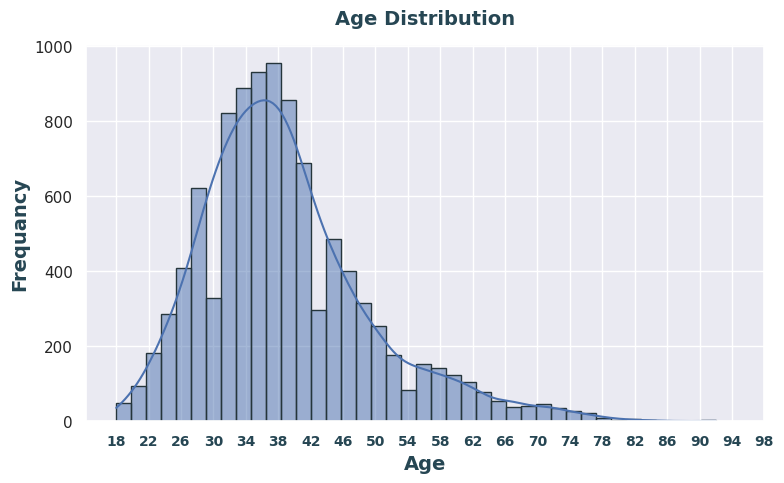

In [ ]:
#showing the Age distribution using histogram
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (8,5)

sns.histplot(x='Age',data = data,palette='viridis',bins=40,kde=True,edgecolor = '#25353B')
plt.xlabel('Age',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.ylabel('Frequancy',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xticks(np.arange(18,100,4),fontsize = 10,fontweight = 'bold',color = '#264653')
plt.title("Age Distribution", fontsize=14, fontweight='bold', color='#264653', pad=15)

plt.tight_layout()
plt.show()

**69% from the customers have Age between 28 and 40 (Most of the customers are in the middle age.**

**95% from the customers have Age between 18 and 60**

**99% from the customers have Age between 18 and 71**

**The distribution of Age is skewed to the Right, meaning some customers are very old (closer to 95).**

****************************************************************************************************
****************************************************************************************************
****************************************************************************************************

**Tenure Column**

In [ ]:
data.Tenure.value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

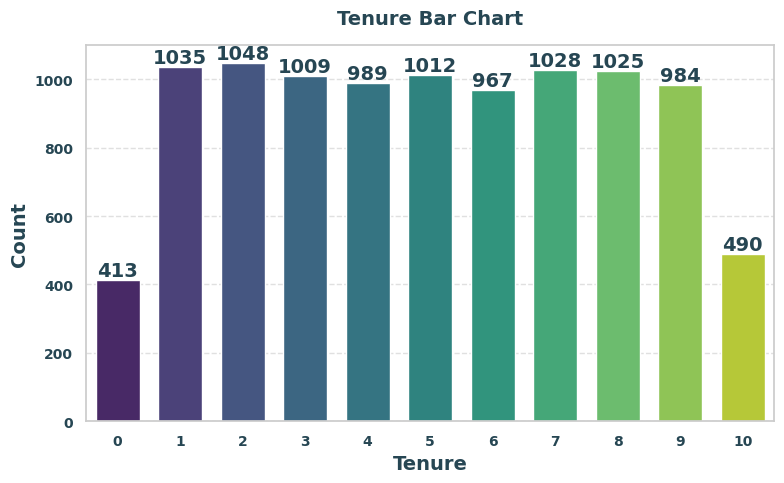

In [ ]:
sns.set_theme(style='whitegrid')
plt.grid(axis='y',linestyle = '--',alpha = 0.7,color='#d3d3d3')

ax = sns.countplot(x = 'Tenure',data = data,palette = 'viridis',width=0.7)
for container in ax.containers:
    ax.bar_label(container,fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xlabel('Tenure',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.ylabel('Count',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.title("Tenure Bar Chart", fontsize=14, fontweight='bold', color='#264653', pad=15)

plt.tight_layout()
plt.show()

**Uniform distribution indicates stability of customers in the bank.**

****************************************************************************************************
****************************************************************************************************
****************************************************************************************************

**Balance Column**

In [ ]:
data[['Balance']].describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,10000.0,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09


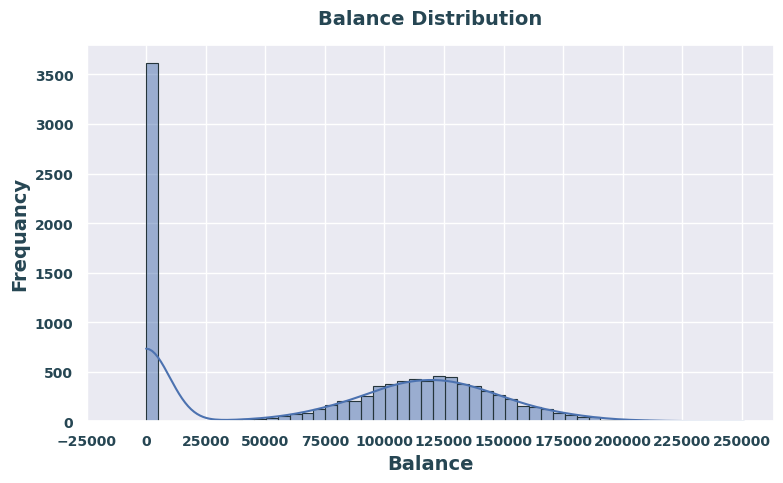

In [ ]:
#showing the Balance distribution using histogram
plt.rcParams['figure.figsize'] = (15,5)
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (8,5)

sns.histplot(x='Balance',data = data,palette='viridis',bins=50,kde=True,edgecolor = '#25353B')
plt.xlabel('Balance',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.ylabel('Frequancy',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xticks(np.arange(-25000,255000,25000),fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.title("Balance Distribution", fontsize=14, fontweight='bold', color='#264653', pad=15)

plt.tight_layout()
plt.show()

In [ ]:
len(data[data.Balance == 0])

3617

In [ ]:
len(data[data.Balance < 50000])

3692

**more than 25% from the customer have balance equal to  0!!!!!!! They may be more likely to churn.**

**NumOfProducts**

In [ ]:
data.NumOfProducts.value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

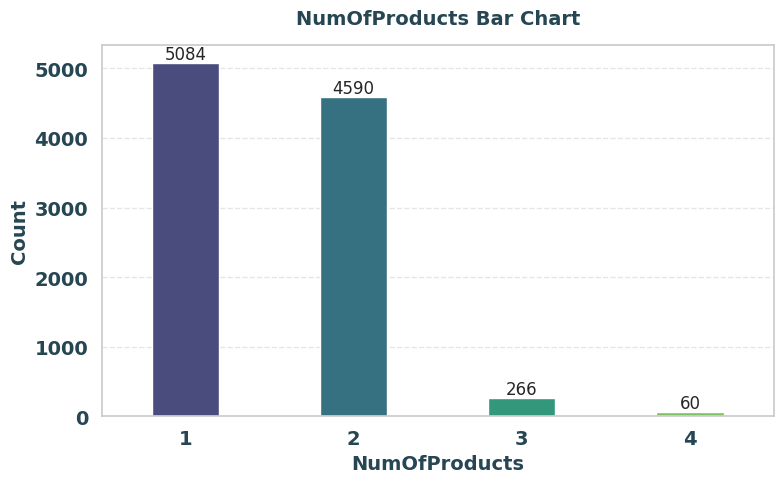

In [ ]:
sns.set_theme(style='whitegrid')
plt.grid(axis= 'y',linestyle = '--',alpha = 0.5)

ax = sns.countplot(x='NumOfProducts',data = data,width=0.4,palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('NumOfProducts',fontweight = 'bold',fontsize = 14,color = '#264653')
plt.xticks(fontweight = 'bold',fontsize = 14,color = '#264653')
plt.ylabel('Count',fontweight = 'bold',fontsize = 14,color = '#264653')
plt.yticks(fontweight = 'bold',fontsize = 14,color = '#264653')
plt.title('NumOfProducts Bar Chart',fontweight = 'bold',fontsize = 14,color = '#264653',pad = 15)

plt.tight_layout()
plt.show()

**HasCrCard**

In [ ]:
data.HasCrCard.value_counts(normalize=True) * 100

HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64

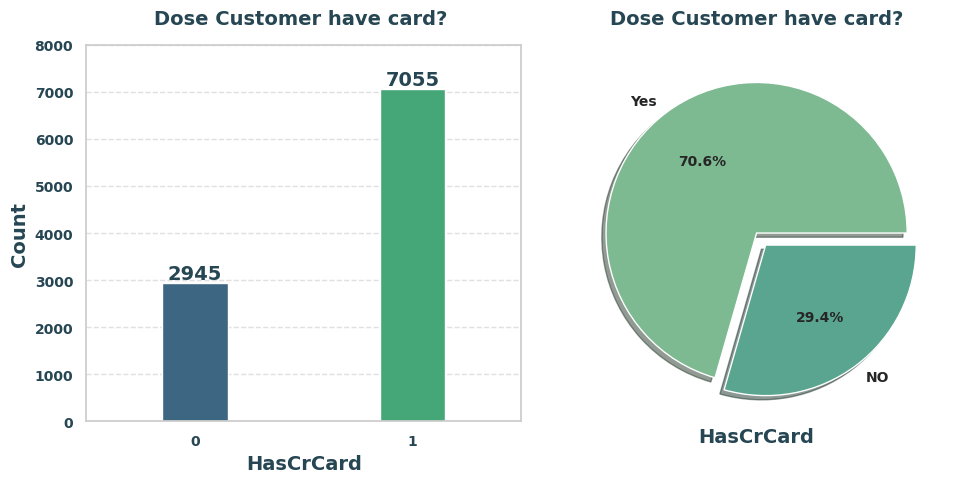

In [ ]:
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

card_val = data['HasCrCard'].value_counts().values

plt.subplot(1,2,1)

#BAR CHART
plt.grid(axis='y',linestyle = '--',alpha = 0.7,color='#d3d3d3')
ax = sns.countplot(x = 'HasCrCard',data = data,palette = 'viridis',width=0.3)
for container in ax.containers:
    ax.bar_label(container,fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xlabel('HasCrCard',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.ylabel('Count',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(np.arange(0,9000,1000),fontsize = 10,fontweight = 'bold',color = '#264653')
plt.title("Dose Customer have card? ", fontsize=14, fontweight='bold', color='#264653', pad=15)

plt.subplot(1,2,2)

#pie Chart
plt.pie(card_val,labels=['Yes','NO'],radius=1,explode = [0,0.1],autopct='%0.1f%%',shadow=True,colors = sns.color_palette("crest"),textprops={'fontsize':10,'fontweight':'bold'})
plt.title("Dose Customer have card?", fontsize=14, fontweight='bold', color='#264653', pad=15)
plt.xlabel('HasCrCard',fontsize = 14,fontweight = 'bold',color = '#264653')

plt.tight_layout()
plt.show()

**30% from the customer dosn not  have CreditCard.**

**customers without creditcard may be less loyal to the bank, increasing the risk of losing them to competitors who offer flexible solutions.**

************************************************************************************************
************************************************************************************************
************************************************************************************************

In [ ]:
data.IsActiveMember.value_counts(normalize=True) * 100

IsActiveMember
1    51.51
0    48.49
Name: proportion, dtype: float64

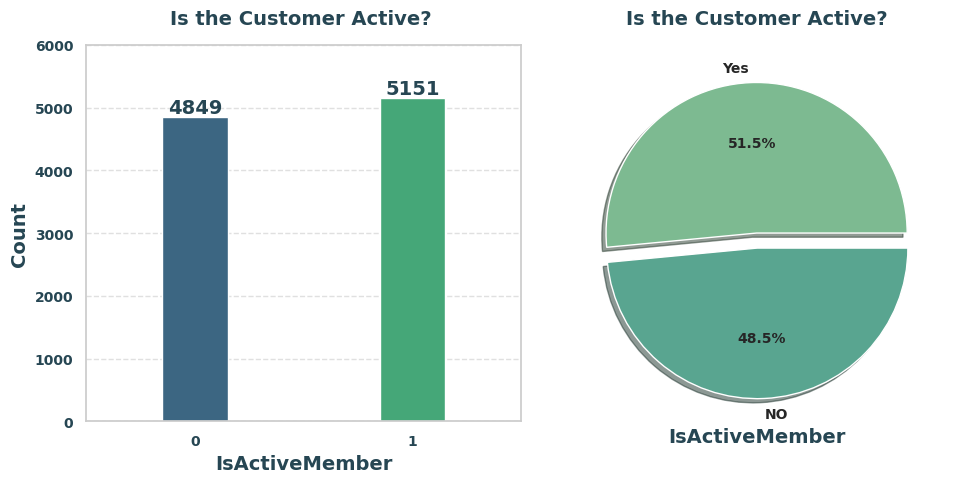

In [ ]:
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

act_val = data['IsActiveMember'].value_counts().values

plt.subplot(1,2,1)

#BAR CHART
plt.grid(axis='y',linestyle = '--',alpha = 0.7,color='#d3d3d3')
ax = sns.countplot(x = 'IsActiveMember',data = data,palette = 'viridis',width=0.3)
for container in ax.containers:
    ax.bar_label(container,fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xlabel('IsActiveMember',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.ylabel('Count',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(np.arange(0,7000,1000),fontsize = 10,fontweight = 'bold',color = '#264653')
plt.title("Is the Customer Active? ", fontsize=14, fontweight='bold', color='#264653', pad=15)

plt.subplot(1,2,2)

#pie Chart
plt.pie(act_val,labels=['Yes','NO'],radius=1,explode = [0,0.1],autopct='%0.1f%%',shadow=True,colors = sns.color_palette("crest"),textprops={'fontsize':10,'fontweight':'bold'})
plt.title("Is the Customer Active?", fontsize=14, fontweight='bold', color='#264653', pad=15)
plt.xlabel('IsActiveMember',fontsize = 14,fontweight = 'bold',color = '#264653')

plt.tight_layout()
plt.show()

**50% from the customer are not active!!!**

**customers may be dissatisfied with the bank's services.**

**Low interaction with the bank makes the customer more likely to leave the churn**

*****************************************************************************************
*****************************************************************************************
*****************************************************************************************

In [ ]:
data[['EstimatedSalary']].describe()

,EstimatedSalary
count,10000.000000
mean,100090.239881
std,57510.492818
min,11.580000
25%,51002.110000
50%,100193.915000
75%,149388.247500
max,199992.480000


In [ ]:
len(data[data.EstimatedSalary < 100])

4

In [ ]:
data[['Balance','EstimatedSalary']][data.EstimatedSalary < 100]

,Balance,EstimatedSalary
2362,122917.71,11.58
5548,0.00,96.27
9010,121669.93,91.75
9647,0.00,90.07


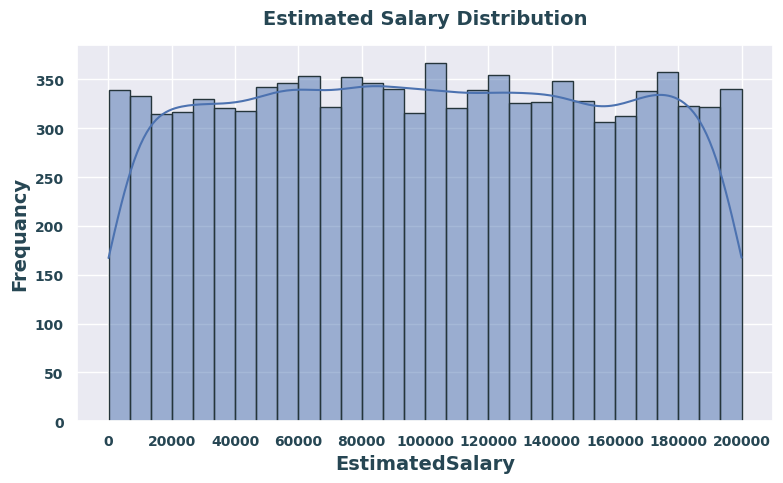

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (8,5)

sns.histplot(x='EstimatedSalary',data = data,palette='viridis',bins=30,kde=True,edgecolor = '#25353B')
plt.xlabel('EstimatedSalary',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.ylabel('Frequancy',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xticks(np.arange(0,220000,20000),fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.title("Estimated Salary Distribution", fontsize=14, fontweight='bold', color='#264653', pad=15)

plt.tight_layout()
plt.show()

**Exited Column**

In [ ]:
data.Exited.value_counts(normalize=True) * 100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

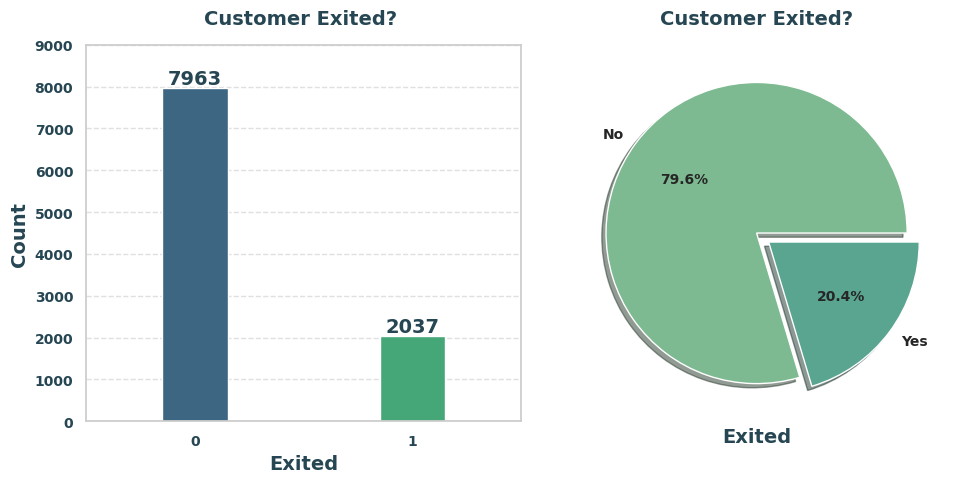

In [ ]:
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

ex_val = data['Exited'].value_counts().values

plt.subplot(1,2,1)

#BAR CHART
plt.grid(axis='y',linestyle = '--',alpha = 0.7,color='#d3d3d3')
ax = sns.countplot(x = 'Exited',data = data,palette = 'viridis',width=0.3)
for container in ax.containers:
    ax.bar_label(container,fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xlabel('Exited',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.ylabel('Count',fontsize = 14,fontweight = 'bold',color = '#264653')
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(np.arange(0,10000,1000),fontsize = 10,fontweight = 'bold',color = '#264653')
plt.title("Customer Exited? ", fontsize=14, fontweight='bold', color='#264653', pad=15)

plt.subplot(1,2,2)

#pie Chart
plt.pie(ex_val,labels=['No','Yes'],radius=1,explode = [0,0.1],autopct='%0.1f%%',shadow=True,colors = sns.color_palette("crest"),textprops={'fontsize':10,'fontweight':'bold'})
plt.title("Customer Exited?", fontsize=14, fontweight='bold', color='#264653', pad=15)
plt.xlabel('Exited',fontsize = 14,fontweight = 'bold',color = '#264653')

plt.tight_layout()
plt.show()

*****************************************************************************************
*****************************************************************************************
*****************************************************************************************

# **Biivariate Analysis**

**Numeric Columns With Exited Column**

**CreditScore and Exited**

In [ ]:
data.groupby('Exited').CreditScore.describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,651.853196,95.653837,405.0,585.0,653.0,718.0,850.0
1,2037.0,645.351497,100.321503,350.0,578.0,646.0,716.0,850.0


**The data are close in both cases. It can be said that CreditScore has no direct effect on Exited**

******************************************************************************************
******************************************************************************************

**Age and Exited**

In [ ]:
data.groupby('Exited').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


**Age seems to have an effect on customer exits. The average age of customers who leave is higher than those who stay**

*********************************************************************************
*********************************************************************************

**Balance and Exited**

In [ ]:
data.groupby('Exited').Balance.describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
1,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


**Customers with high balances are more likely to leave.!!**

************************************************************************
************************************************************************

**EstimatedSalary and Exited**

In [ ]:
data.groupby('Exited').EstimatedSalary.describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,99738.391772,57405.586966,90.07,50783.49,99645.04,148609.955,199992.48
1,2037.0,101465.677531,57912.418071,11.58,51907.72,102460.84,152422.910,199808.10


**The data are close in both cases. It can be said that CreditScore has no direct effect on Exited**

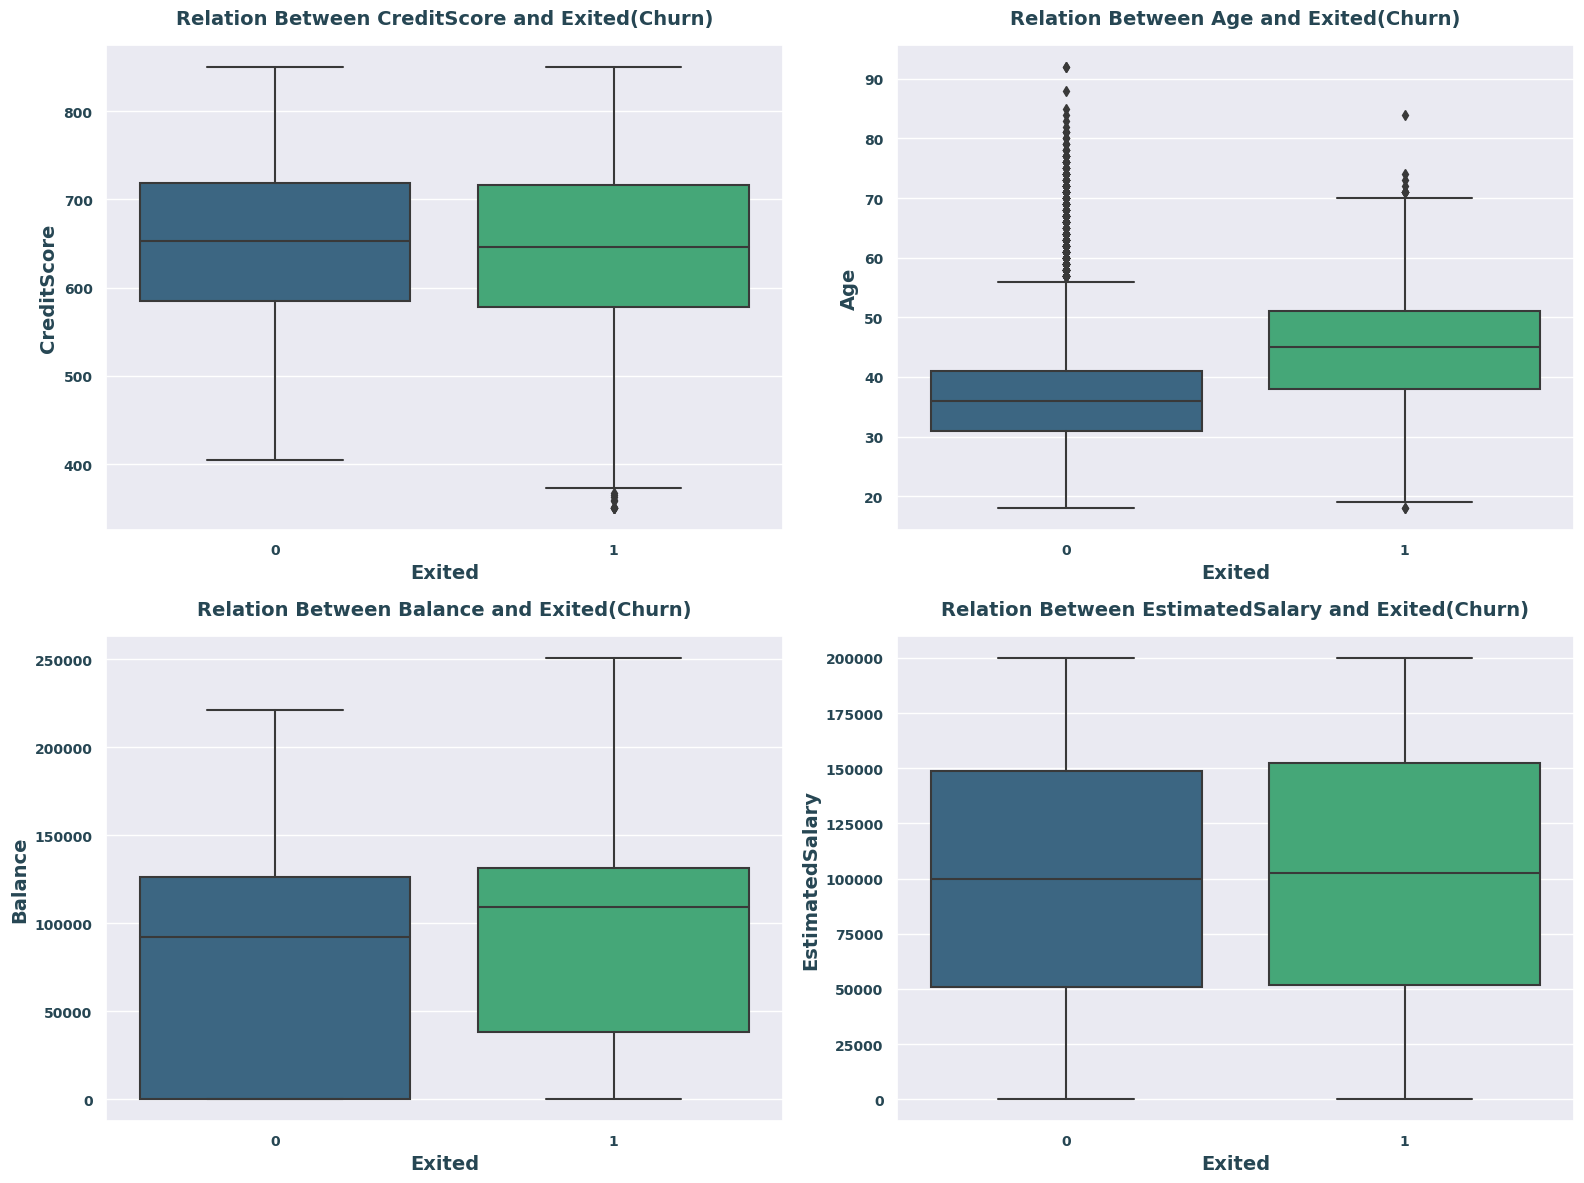

In [ ]:
plt.rcParams['figure.figsize'] = (16,12)
sns.set_theme(style = 'darkgrid')

numeric_column = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

for i in range(len(numeric_column)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='Exited',y=numeric_column[i],data = data,palette='viridis')

    plt.xlabel('Exited',fontsize = 14,fontweight = 'bold',color = '#264653')
    plt.ylabel(numeric_column[i],fontsize = 14,fontweight = 'bold',color = '#264653')
    plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
    plt.yticks(fontsize = 10,fontweight = 'bold',color = '#264653')
    plt.title(f'Relation Between {numeric_column[i]} and Exited(Churn)',fontsize = 14,fontweight = 'bold',color = '#264653',pad = 15)

plt.tight_layout()
plt.show()

**Categorical Columns With Exited Column**

**Geography Column**

In [ ]:
pd.crosstab(data.Exited,data.Geography,margins=True)

Geography,France,Germany,Spain,All
Exited,,,,
0,4204,1695,2064,7963
1,810,814,413,2037
All,5014,2509,2477,10000


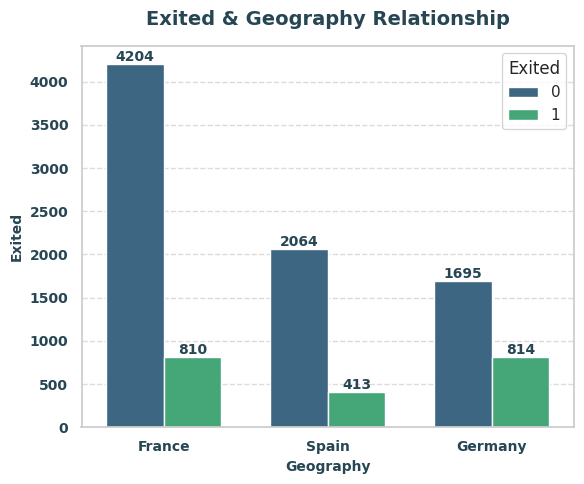

In [ ]:
plt.rcParams['figure.figsize'] = (6,5)

sns.set_theme(style='whitegrid')
plt.grid(axis='y',linestyle = '--',alpha = 0.7)

ax = sns.countplot(x='Geography',data = data,hue='Exited',palette = 'viridis',width=0.7)
for container in ax.containers:
    ax.bar_label(container,fontsize=10,fontweight = 'bold',color = '#264653')

plt.title('Exited & Geography Relationship',fontsize = 14,fontweight = 'bold',color = '#264653',pad = 15)
plt.xlabel('Geography',fontsize = 10,fontweight = 'bold',color = '#264653')
plt.ylabel('Exited',fontsize = 10,fontweight = 'bold',color = '#264653')
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(fontsize = 10,fontweight = 'bold',color = '#264653')

plt.tight_layout()
plt.show()

**32% from customer in Germany are exited!!!,It seems that the bank does not meet the needs of a large group of customers in Germany.**

*************************************************************************************
************************************************************************************

In [ ]:
pd.crosstab(data.Exited,data.Gender,margins=True)

Gender,Female,Male,All
Exited,,,
0,3404,4559,7963
1,1139,898,2037
All,4543,5457,10000


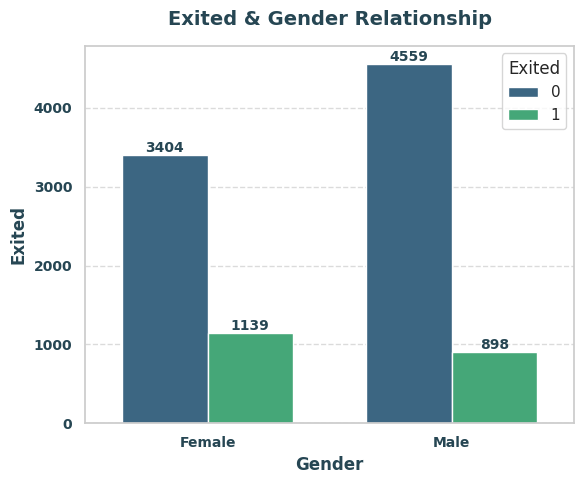

In [ ]:
plt.rcParams['figure.figsize'] = (6,5)

sns.set_theme(style='whitegrid')
plt.grid(axis='y',linestyle = '--',alpha = 0.7)

ax = sns.countplot(x='Gender',data = data,hue='Exited',palette = 'viridis',width=0.7)
for container in ax.containers:
    ax.bar_label(container,fontsize=10,fontweight = 'bold',color = '#264653')

plt.title('Exited & Gender Relationship',fontsize = 14,fontweight = 'bold',color = '#264653',pad = 15)
plt.xlabel('Gender',fontsize = 12,fontweight = 'bold',color = '#264653')
plt.ylabel('Exited',fontsize = 12,fontweight = 'bold',color = '#264653')
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(fontsize = 10,fontweight = 'bold',color = '#264653')

plt.tight_layout()
plt.show()

**Females tend to leave more than males**

**********************************************************************************
**********************************************************************************

**Tenure Column**

In [ ]:
pd.crosstab(data.Exited,data.Tenure,margins=True)

Tenure,0,1,2,3,4,5,6,7,8,9,10,All
Exited,,,,,,,,,,,,
0,318,803,847,796,786,803,771,851,828,771,389,7963
1,95,232,201,213,203,209,196,177,197,213,101,2037
All,413,1035,1048,1009,989,1012,967,1028,1025,984,490,10000


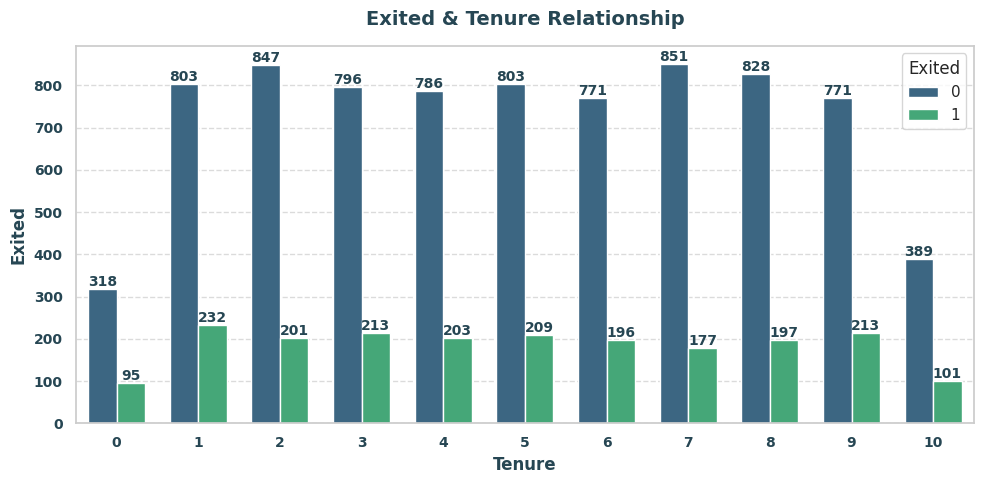

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)

sns.set_theme(style='whitegrid')
plt.grid(axis='y',linestyle = '--',alpha = 0.7)

ax = sns.countplot(x='Tenure',data = data,hue='Exited',palette = 'viridis',width=0.7)
for container in ax.containers:
    ax.bar_label(container,fontsize=10,fontweight = 'bold',color = '#264653')

plt.title('Exited & Tenure Relationship',fontsize = 14,fontweight = 'bold',color = '#264653',pad = 15)
plt.xlabel('Tenure',fontsize = 12,fontweight = 'bold',color = '#264653')
plt.ylabel('Exited',fontsize = 12,fontweight = 'bold',color = '#264653')
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(fontsize = 10,fontweight = 'bold',color = '#264653')

plt.tight_layout()
plt.show()

**No large effect**

******************************************************************************
******************************************************************************

**NumOfProducts Column**

In [ ]:
pd.crosstab(data.Exited,data.NumOfProducts,margins=True)

NumOfProducts,1,2,3,4,All
Exited,,,,,
0,3675,4242,46,0,7963
1,1409,348,220,60,2037
All,5084,4590,266,60,10000


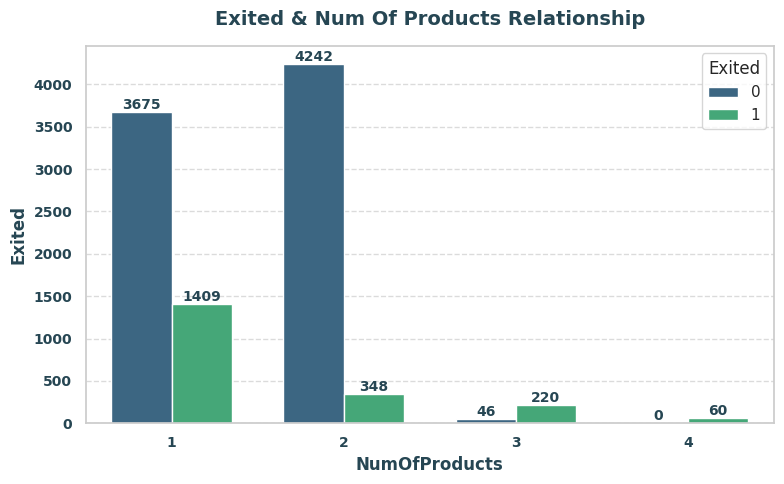

In [ ]:
plt.rcParams['figure.figsize'] = (8,5)

sns.set_theme(style='whitegrid')
plt.grid(axis='y',linestyle = '--',alpha = 0.7)

ax = sns.countplot(x='NumOfProducts',data = data,hue='Exited',palette = 'viridis',width=0.7)
for container in ax.containers:
    ax.bar_label(container,fontsize=10,fontweight = 'bold',color = '#264653')

plt.title('Exited & Num Of Products Relationship',fontsize = 14,fontweight = 'bold',color = '#264653',pad = 15)
plt.xlabel('NumOfProducts',fontsize = 12,fontweight = 'bold',color = '#264653')
plt.ylabel('Exited',fontsize = 12,fontweight = 'bold',color = '#264653')
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(fontsize = 10,fontweight = 'bold',color = '#264653')

plt.tight_layout()
plt.show()

*******************************************************************************
*******************************************************************************

**HasCrCard Column**

In [ ]:
pd.crosstab(data.Exited,data.HasCrCard,margins=True)

HasCrCard,0,1,All
Exited,,,
0,2332,5631,7963
1,613,1424,2037
All,2945,7055,10000


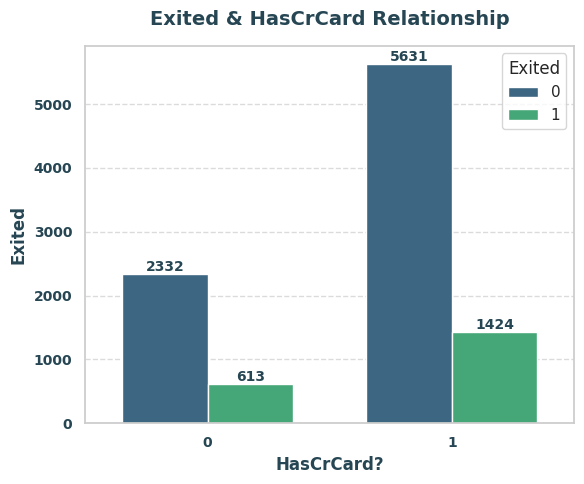

In [ ]:
plt.rcParams['figure.figsize'] = (6,5)

sns.set_theme(style='whitegrid')
plt.grid(axis='y',linestyle = '--',alpha = 0.7)

ax = sns.countplot(x='HasCrCard',data = data,hue='Exited',palette = 'viridis',width=0.7)
for container in ax.containers:
    ax.bar_label(container,fontsize=10,fontweight = 'bold',color = '#264653')

plt.title('Exited & HasCrCard Relationship',fontsize = 14,fontweight = 'bold',color = '#264653',pad = 15)
plt.xlabel('HasCrCard?',fontsize = 12,fontweight = 'bold',color = '#264653')
plt.ylabel('Exited',fontsize = 12,fontweight = 'bold',color = '#264653')
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(fontsize = 10,fontweight = 'bold',color = '#264653')

plt.tight_layout()
plt.show()

**No Effect**

***********************************************************************************
***********************************************************************************

**IsActiveMember Column**

In [ ]:
pd.crosstab(data.Exited,data.IsActiveMember,margins=True)

IsActiveMember,0,1,All
Exited,,,
0,3547,4416,7963
1,1302,735,2037
All,4849,5151,10000


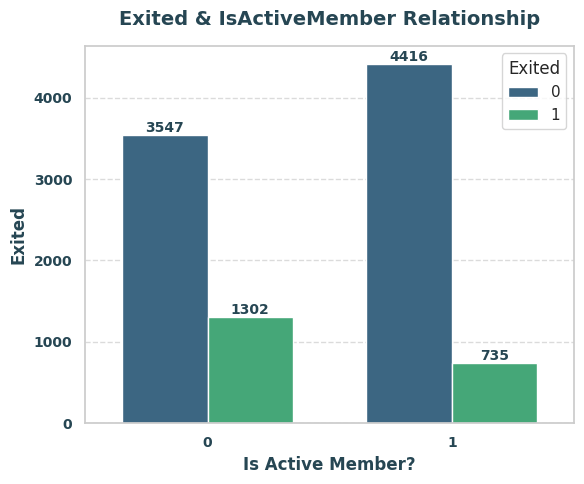

In [ ]:
plt.rcParams['figure.figsize'] = (6,5)

sns.set_theme(style='whitegrid')
plt.grid(axis='y',linestyle = '--',alpha = 0.7)

ax = sns.countplot(x='IsActiveMember',data = data,hue='Exited',palette = 'viridis',width=0.7)
for container in ax.containers:
    ax.bar_label(container,fontsize=10,fontweight = 'bold',color = '#264653')

plt.title('Exited & IsActiveMember Relationship',fontsize = 14,fontweight = 'bold',color = '#264653',pad = 15)
plt.xlabel('Is Active Member?',fontsize = 12,fontweight = 'bold',color = '#264653')
plt.ylabel('Exited',fontsize = 12,fontweight = 'bold',color = '#264653')
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(fontsize = 10,fontweight = 'bold',color = '#264653')

plt.tight_layout()
plt.show()

**Non-active customers tend to leave more than active customers**

***************************************************************************
***************************************************************************

# Multivariate Analysis

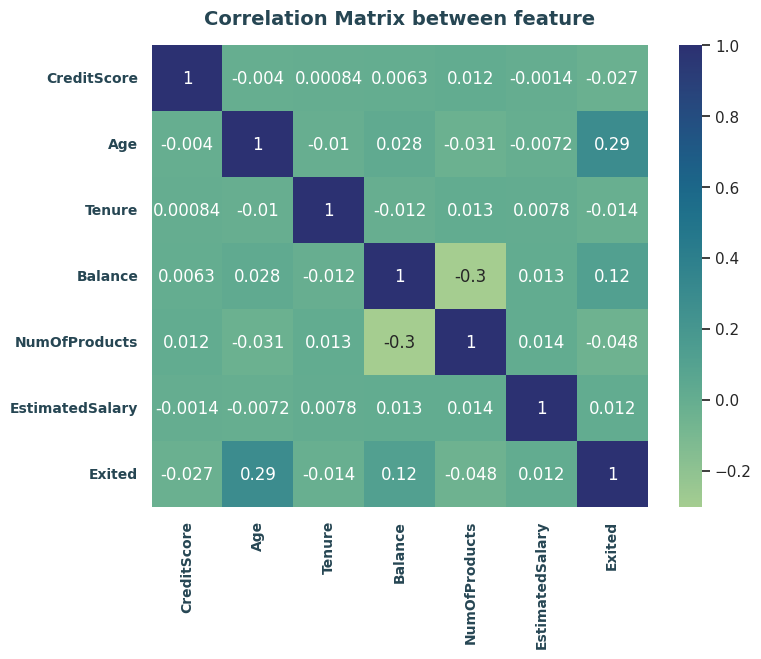

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)
df = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']]
Correleation = df.corr()
sns.heatmap(Correleation,annot=True,cmap='crest')
plt.title('Correlation Matrix between feature',fontsize = 14,fontweight = 'bold',color = '#264653',pad = 15)
plt.xticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.yticks(fontsize = 10,fontweight = 'bold',color = '#264653')
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import joblib

In [4]:
# Load Dataset
data = pd.read_csv('/content/Churn_Modelling.csv')

# Drop unnecessary columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

# Split dataset
X = data.drop(columns=['Exited'])
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train RandomForest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [6]:
# Print Evaluation Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy: 0.8665
ROC AUC Score: 0.7141
Confusion Matrix:
 [[1551   56]
 [ 211  182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [7]:
# Save the model and scaler for automation
joblib.dump(model, 'churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Load and Use the Model (Example Automation Script)
def predict_churn(new_data):
    loaded_model = joblib.load('churn_model.pkl')
    loaded_scaler = joblib.load('scaler.pkl')
    new_data_scaled = loaded_scaler.transform(new_data)
    return loaded_model.predict(new_data_scaled)

In [9]:
# Split dataset
X = data.drop(columns=['Exited'])
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train GradientBoosting Model
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print Evaluation Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)

Accuracy: 0.8675
ROC AUC Score: 0.7234
Confusion Matrix:
 [[1544   63]
 [ 202  191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [12]:
# Split dataset
X = data.drop(columns=['Exited'])
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print Evaluation Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', classification_rep)


Accuracy: 0.8110
ROC AUC Score: 0.5806
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

